In [1]:
from datascience import *
import numpy as np
import math
import scipy.stats as stats
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [2]:
Data = Table.read_table('Games.csv')

# Q3.
Do developers that make more games have higher average rating for their games? Should users choose games based on the developer?

To study this problem, we clean the data so that only the counts and ratings are kept.

In [3]:
Data = Data.select('Developer','Average User Rating')
data1 = Data.pivot('Average User Rating','Developer')

In [4]:
counts = []
means = []
for i in range(data1.num_rows):
    count = 0
    _sum = 0
    for j in range(1,10):
        count += data1.column(j)[i]
        _sum += (data1.column(j)[i] * (0.5*(j+1)))
    counts.append(count)
    means.append(_sum/count)
data1 = data1.with_columns('Number of games',np.array(counts),'Average rating of games',np.array(means))
developers = data1.select('Number of games','Average rating of games').sort(0,descending = 1)

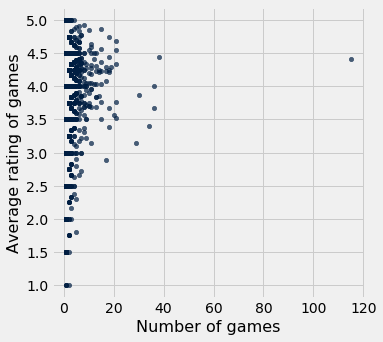

In [5]:
developers.scatter(0)

This scatter plot is not very informative, let's do some operations to visusalize the data more clearly.

First, lets group developers that make the same number of games and see their average ratings.

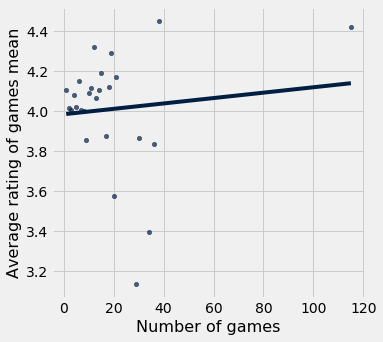

In [6]:
grouped_data = developers.group('Number of games',np.mean).sort(0,descending = 1)
grouped_data.scatter("Number of games",fit_line = 1)

From the scatter polt, it seems that developers that make 20 games or more have very scatterred ratings, since there are only few of them, let's remove them first and discuss about them later.

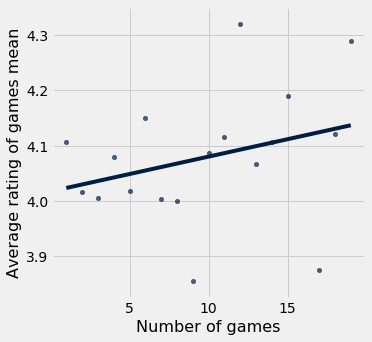

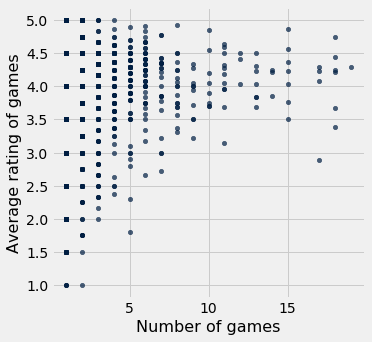

In [7]:
grouped_data.where('Number of games',are.below(20)).scatter("Number of games",fit_line = 1)
developers.where('Number of games',are.below(20)).scatter("Number of games")

The upper plot shows the average ratings of developers are positively related to the number of games they publishe.
The lower plot shows that developers that make more games tend to receive more stable feedback, while those who make fewer games tend to receive less evenly distributed ratings. In other words, the standard deviation of ratings tend to decrease when the number of games increase, as the following graph shows.

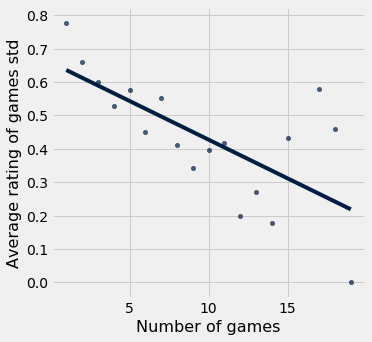

In [8]:
developers.where('Number of games',are.below(20)).group('Number of games',np.std).scatter('Number of games',fit_line = 1)

In [9]:
grouped_data_df = grouped_data.where('Number of games',are.below(20)).relabeled(0,'Num').relabeled(1,'Rating').to_df()
result = smf.ols(formula="Rating ~ Num", data=grouped_data_df).fit()
result.summary()

/Users/spence/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.534
Date:                Sat, 30 Nov 2019   Prob (F-statistic):              0.233
Time:                        06:03:37   Log-Likelihood:                 14.097
No. Observations:                  18   AIC:                            -24.19
Df Residuals:                      16   BIC:                            -22.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0171      0.056     71.238      0.000       3.898       4.137
Num            0.0063      0.005      1.238      0.233      -0.004       0.017
==============================================================================
Omnibus:                        2.059   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                0.649
Skew:                          -0.380   Prob(JB):                        0.723
Kurtosis:                       3.536   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We tried to use linear regression to quantify the relation between number of games and rating, however, the R_squared is low, we cannot view it as a reliable model. Pityfully, the best we can derive is a positive relation.

Now, lets take a look at the data we ignored earlier. What ratings do developers that make over 20 games have?

4.066396036879042


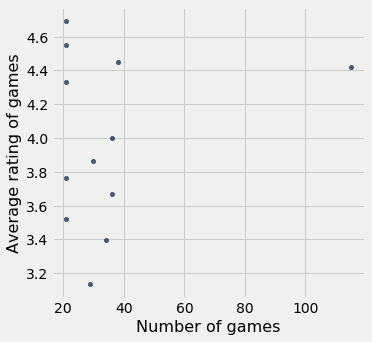

In [10]:
developers.where('Number of games',are.above(20)).scatter("Number of games")
print(Data.column('Average User Rating').mean())

From the plot, we can find that the ratings are distributed quite evenly on both sides of the average rating of all games in the dataset. It is not surprising though. Among the developers that publish a lot of games, some may be doing so because they have strong abilities, Tapps Tecnologia for example, some may be just publishing random rubbish and hoping for luck.

# Comments and Conclusions:
     
At the end of the day, what's our answer to this question?

Intuitively, people may assume that more productive developers tend to make better games. From the dataset, we did find the positive relation between average ratings and number of games. Thus, we can confirm that the intuition is right. But the relation is too weak to be quantified, which means that it isn't a decisive factor of the games' quality. 

However, that doesn't mean the number of games cannot be a useful reference. We discovered that there is a significant, almost linear decrease in the standard deviation of ratings when the number of games increase. The real-life meaning of this is that when a new game is launched, and the developer has published many other games before, consumers can use the rating of its other games as a good reference, and vice versa.


